In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
data_= pd.read_csv("data.csv")

In [3]:
data_.shape

(8518, 8)

In [4]:
data_.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1

In [5]:
data_.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [6]:
data_[data_.duplicated(keep=False)]

Reviewer Name Review Title Place of Review  Up Votes  Down Votes Month  \
8510           NaN          NaN             NaN       NaN         NaN   NaN   
8511           NaN          NaN             NaN       NaN         NaN   NaN   
8512           NaN          NaN             NaN       NaN         NaN   NaN   
8514           NaN          NaN             NaN       NaN         NaN   NaN   
8515           NaN          NaN             NaN       NaN         NaN   NaN   
8516           NaN          NaN             NaN       NaN         NaN   NaN   
8517           NaN          NaN             NaN       NaN         NaN   NaN   

     Review text  Ratings  
8510         NaN        1  
8511         NaN        1  
8512         NaN        2  
8514         NaN        2  
8515         NaN        4  
8516         NaN        1  
8517         NaN        4

In [7]:
data_nodup = data_.drop_duplicates()

In [8]:
data_nodup.isnull().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [9]:
data_nodup = data_nodup.dropna(subset=['Review text'])

In [10]:
data_nodup.isnull().sum()

Reviewer Name        2
Review Title         2
Place of Review     42
Up Votes             2
Down Votes           2
Month              457
Review text          0
Ratings              0
dtype: int64

In [11]:
data_nodup.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [12]:
data = data_nodup.drop(['Reviewer Name', 'Place of Review', 'Up Votes', 'Down Votes', 'Month', 'Review Title'], axis=1)

In [13]:
data.shape

(8510, 2)

In [14]:
data.head()

Review text  Ratings
0  Nice product, good quality, but price is now r...        4
1  They didn't supplied Yonex Mavis 350. Outside ...        1
2  Worst product. Damaged shuttlecocks packed in ...        1
3  Quite O. K. , but nowadays  the quality of the...        3
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1

In [15]:
# Create a new column 'Sentiment' based on Ratings
data['Sentiment'] = data['Ratings'].apply(lambda x: 'Positive' if x >= 3 else 'Negative')

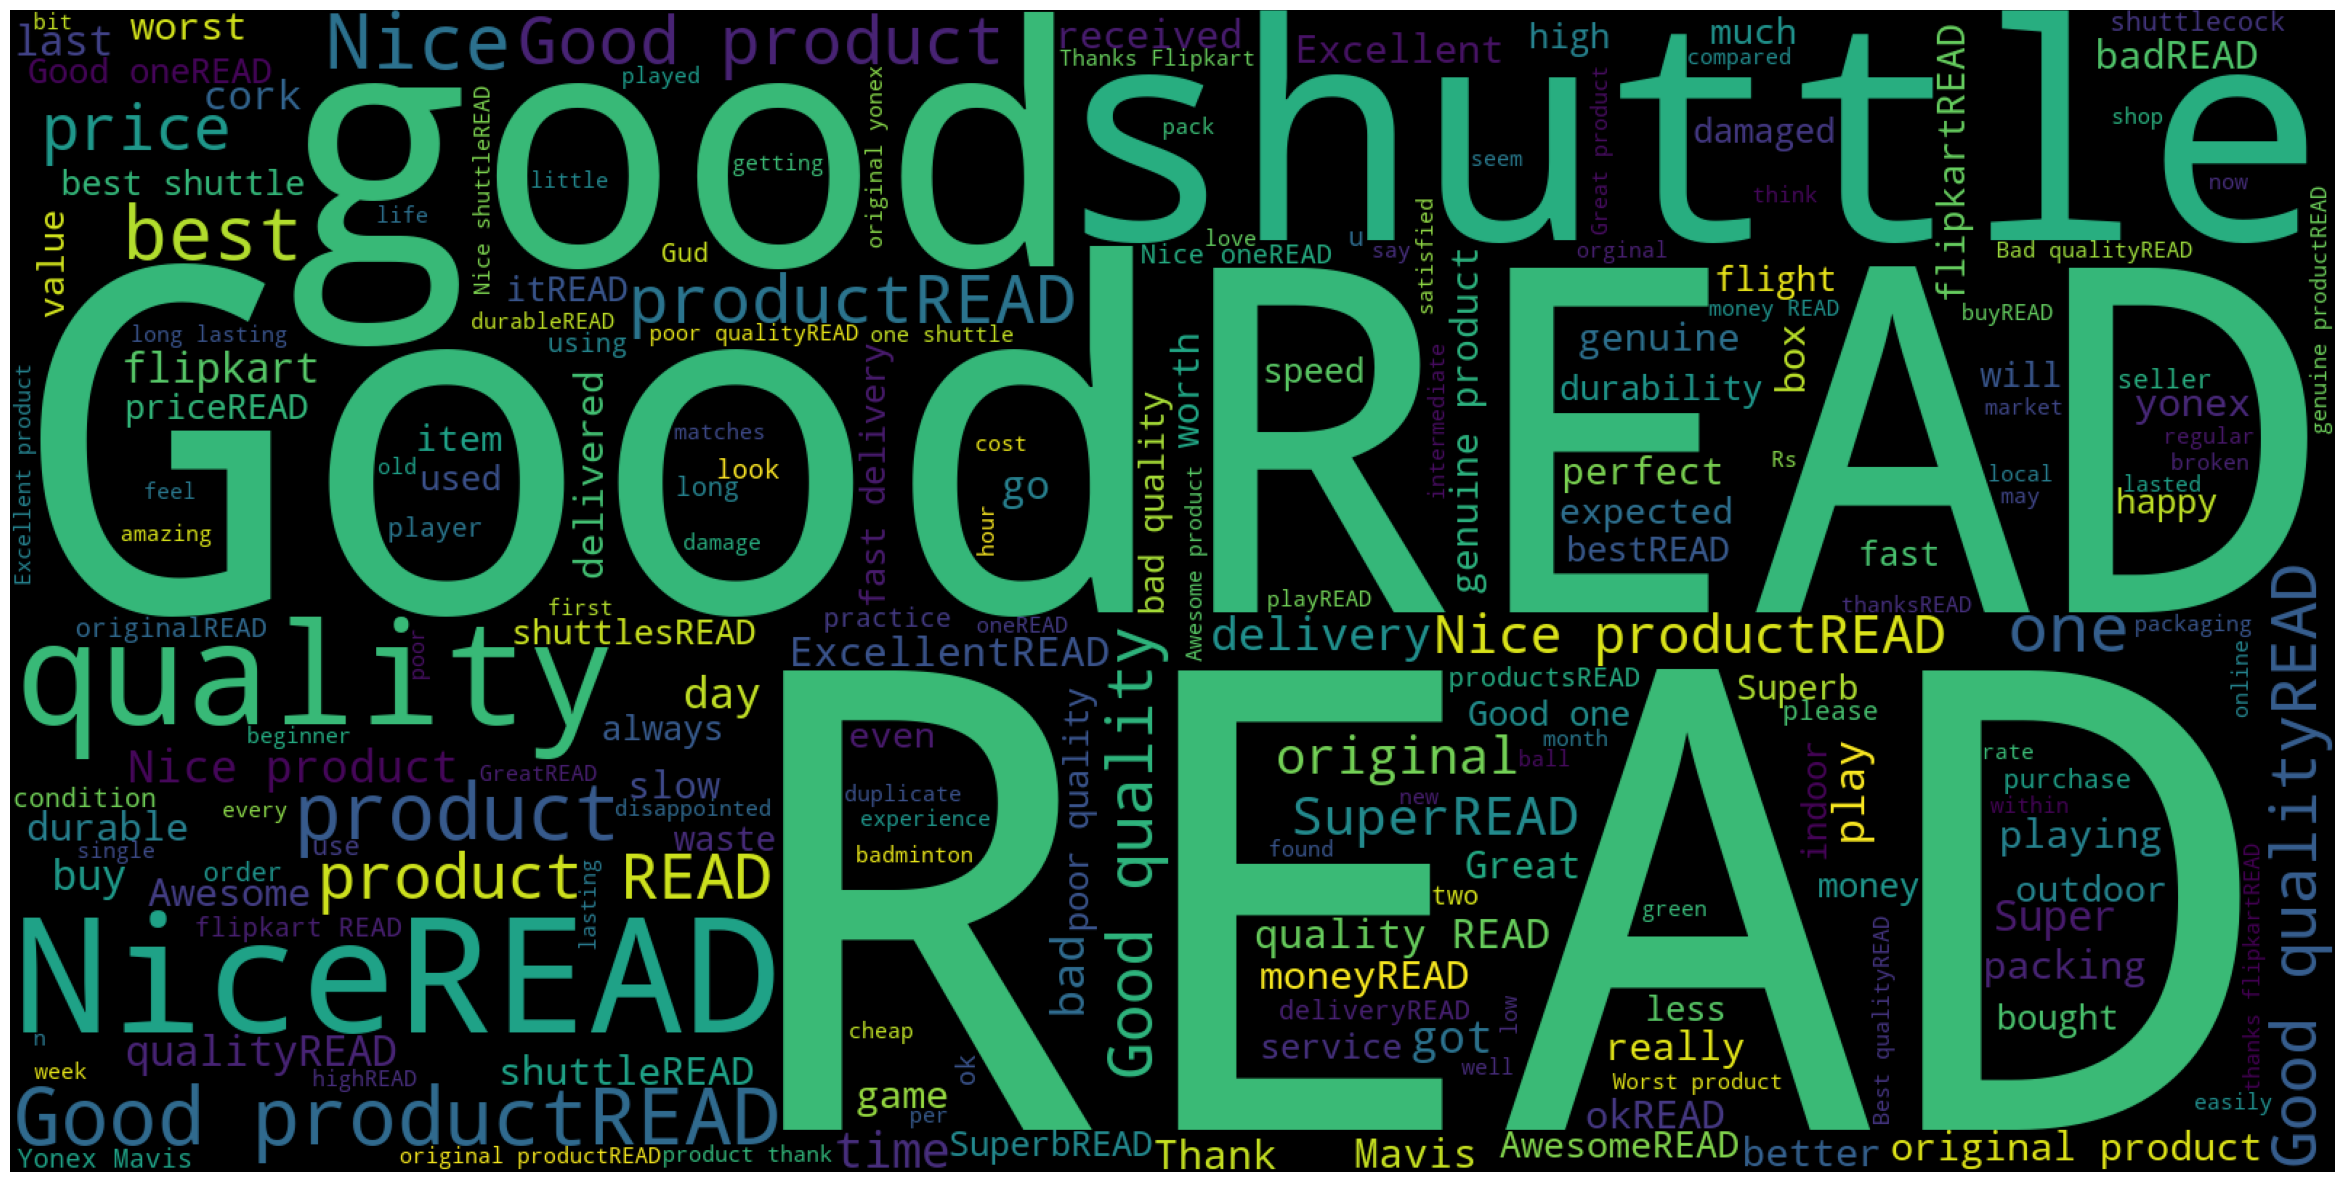

In [16]:
wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data['Review text']))

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

## Step 1: Identify Input & Output

In [17]:
# Step 1: Identify Input and Output

X = data[['Review text']] # the column text contains textual data to extract features from
y = data['Sentiment'] # this is the column we are learning to predict.
print(X.shape, y.shape)

(8510, 1) (8510,)


## Step 2: Split Data Into Training & Testing Set

In [18]:
# Step 2: Split the data into train and test
# split X and y into training and testing sets.
# By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6382, 1) (6382,)
(2128, 1) (2128,)


## Step 3 - Data Preprocessing on train data (X_train)

In [19]:
X_train[y_train == 'Positive'] # Pandas DataFrame

Review text
1095                               Very nice 👍READ MORE
7326                  Very good on dry weatherREAD MORE
1377                                Well brandREAD MORE
2127  Firstly  Yonex is best company  for badminton ...
5096                                      GoodREAD MORE
...                                                 ...
144                               Nice productREAD MORE
5056                                    superbREAD MORE
2895                            Quality good..READ MORE
7813           NOT BAD ITS REALLY GOOD QUALITYREAD MORE
905                                       GoodREAD MORE

[5565 rows x 1 columns]

In [20]:
X_train['Review text'][y_train == 'Positive'] #Pandas Series

1095                                 Very nice 👍READ MORE
7326                    Very good on dry weatherREAD MORE
1377                                  Well brandREAD MORE
2127    Firstly  Yonex is best company  for badminton ...
5096                                        GoodREAD MORE
                              ...                        
144                                 Nice productREAD MORE
5056                                      superbREAD MORE
2895                              Quality good..READ MORE
7813             NOT BAD ITS REALLY GOOD QUALITYREAD MORE
905                                         GoodREAD MORE
Name: Review text, Length: 5565, dtype: object

In [21]:
def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

### Positive Review Word Cloud

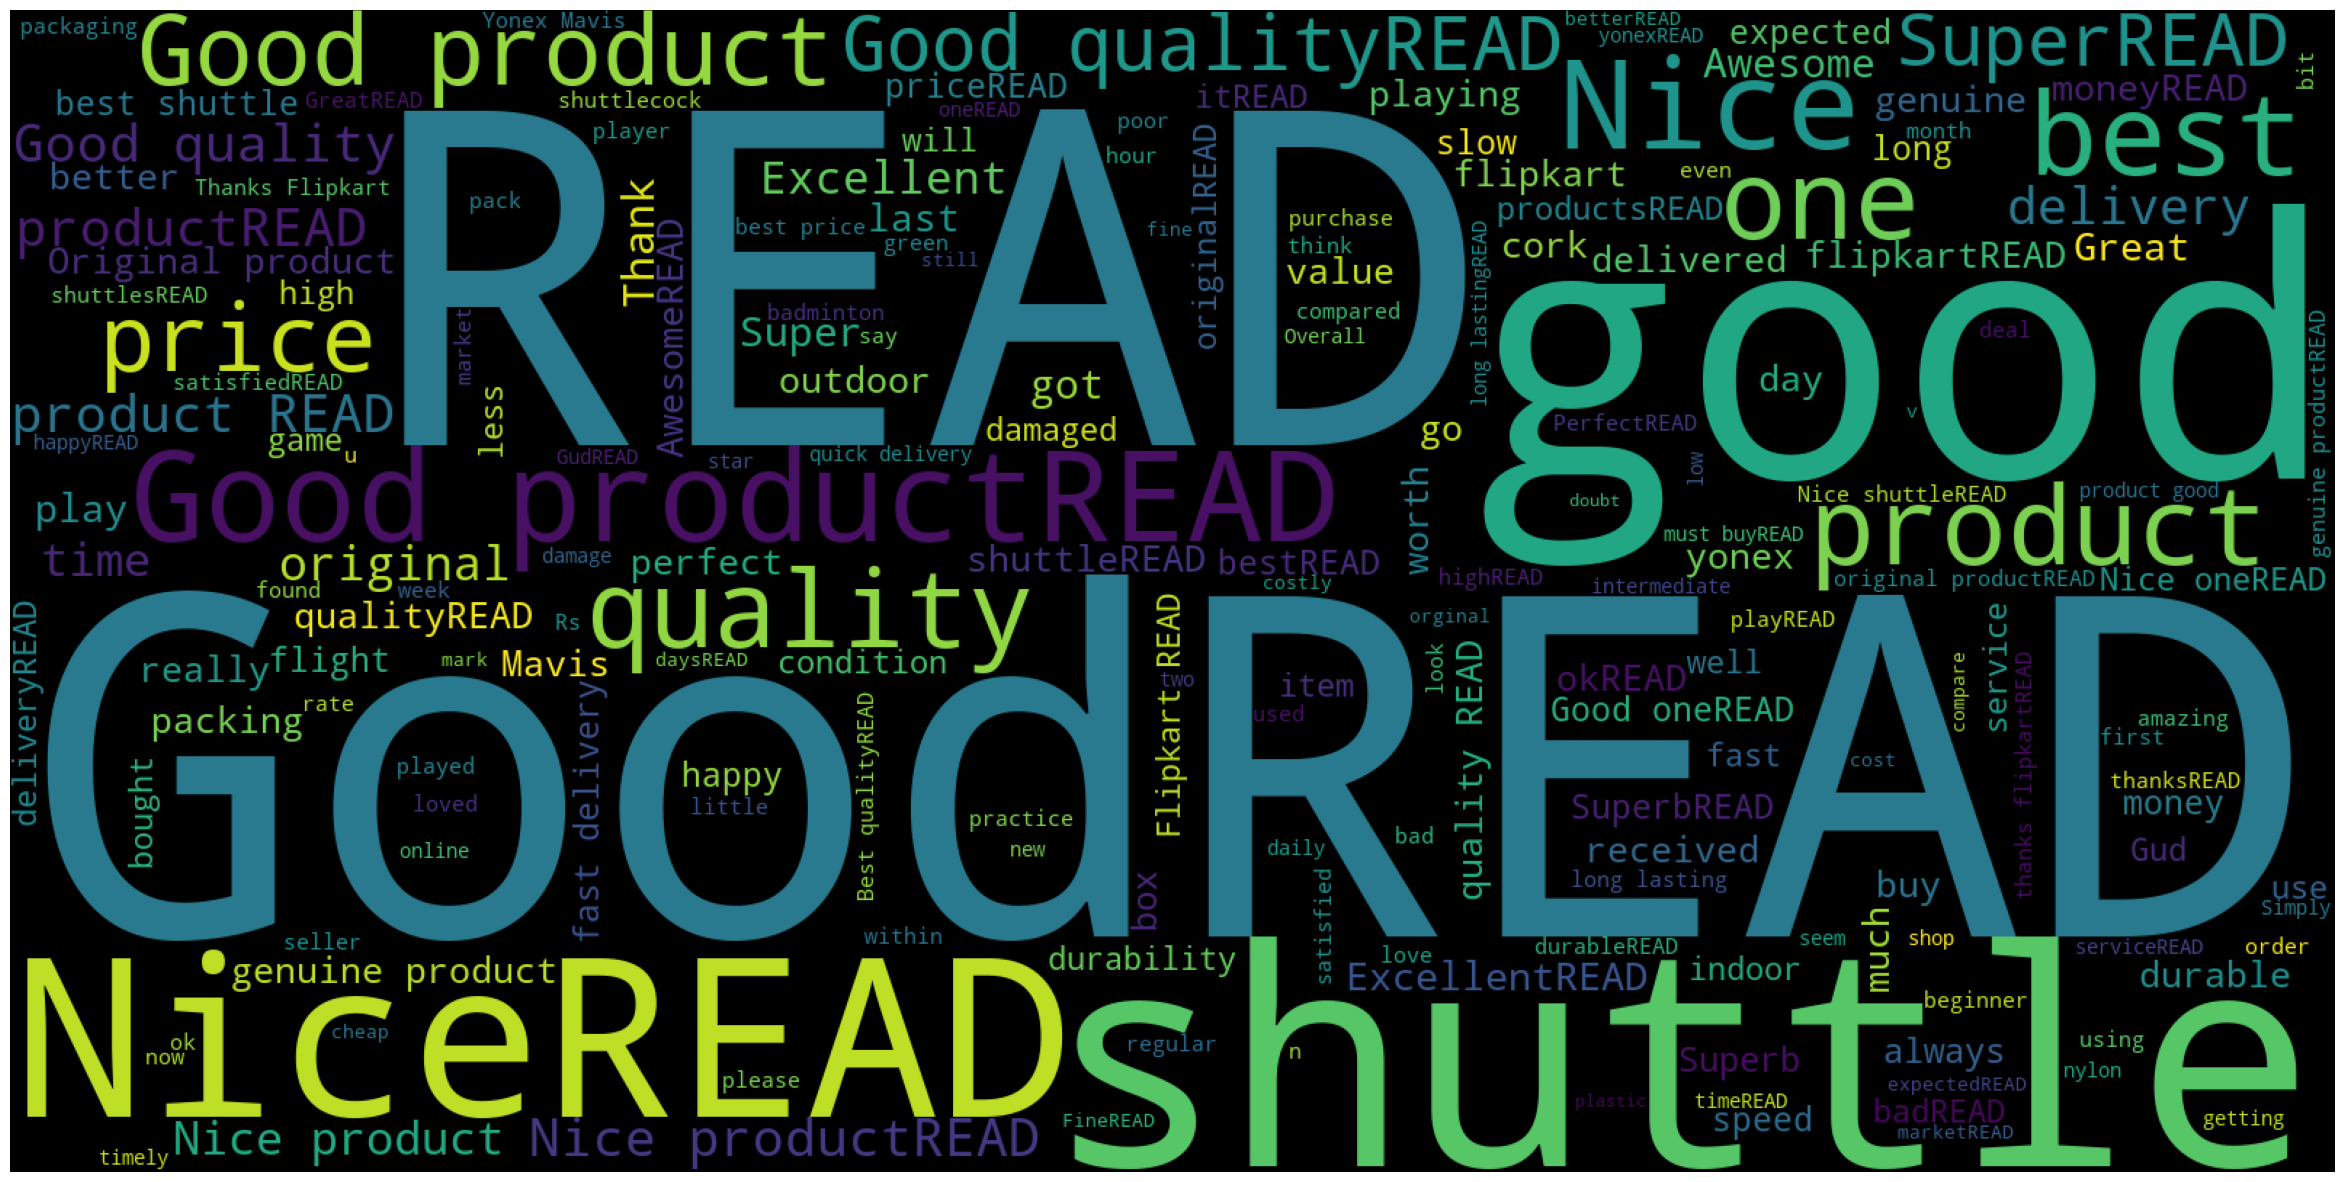

In [22]:
display_wordcloud(X_train['Review text'][y_train == 'Positive'])

### Negative Review Word Cloud

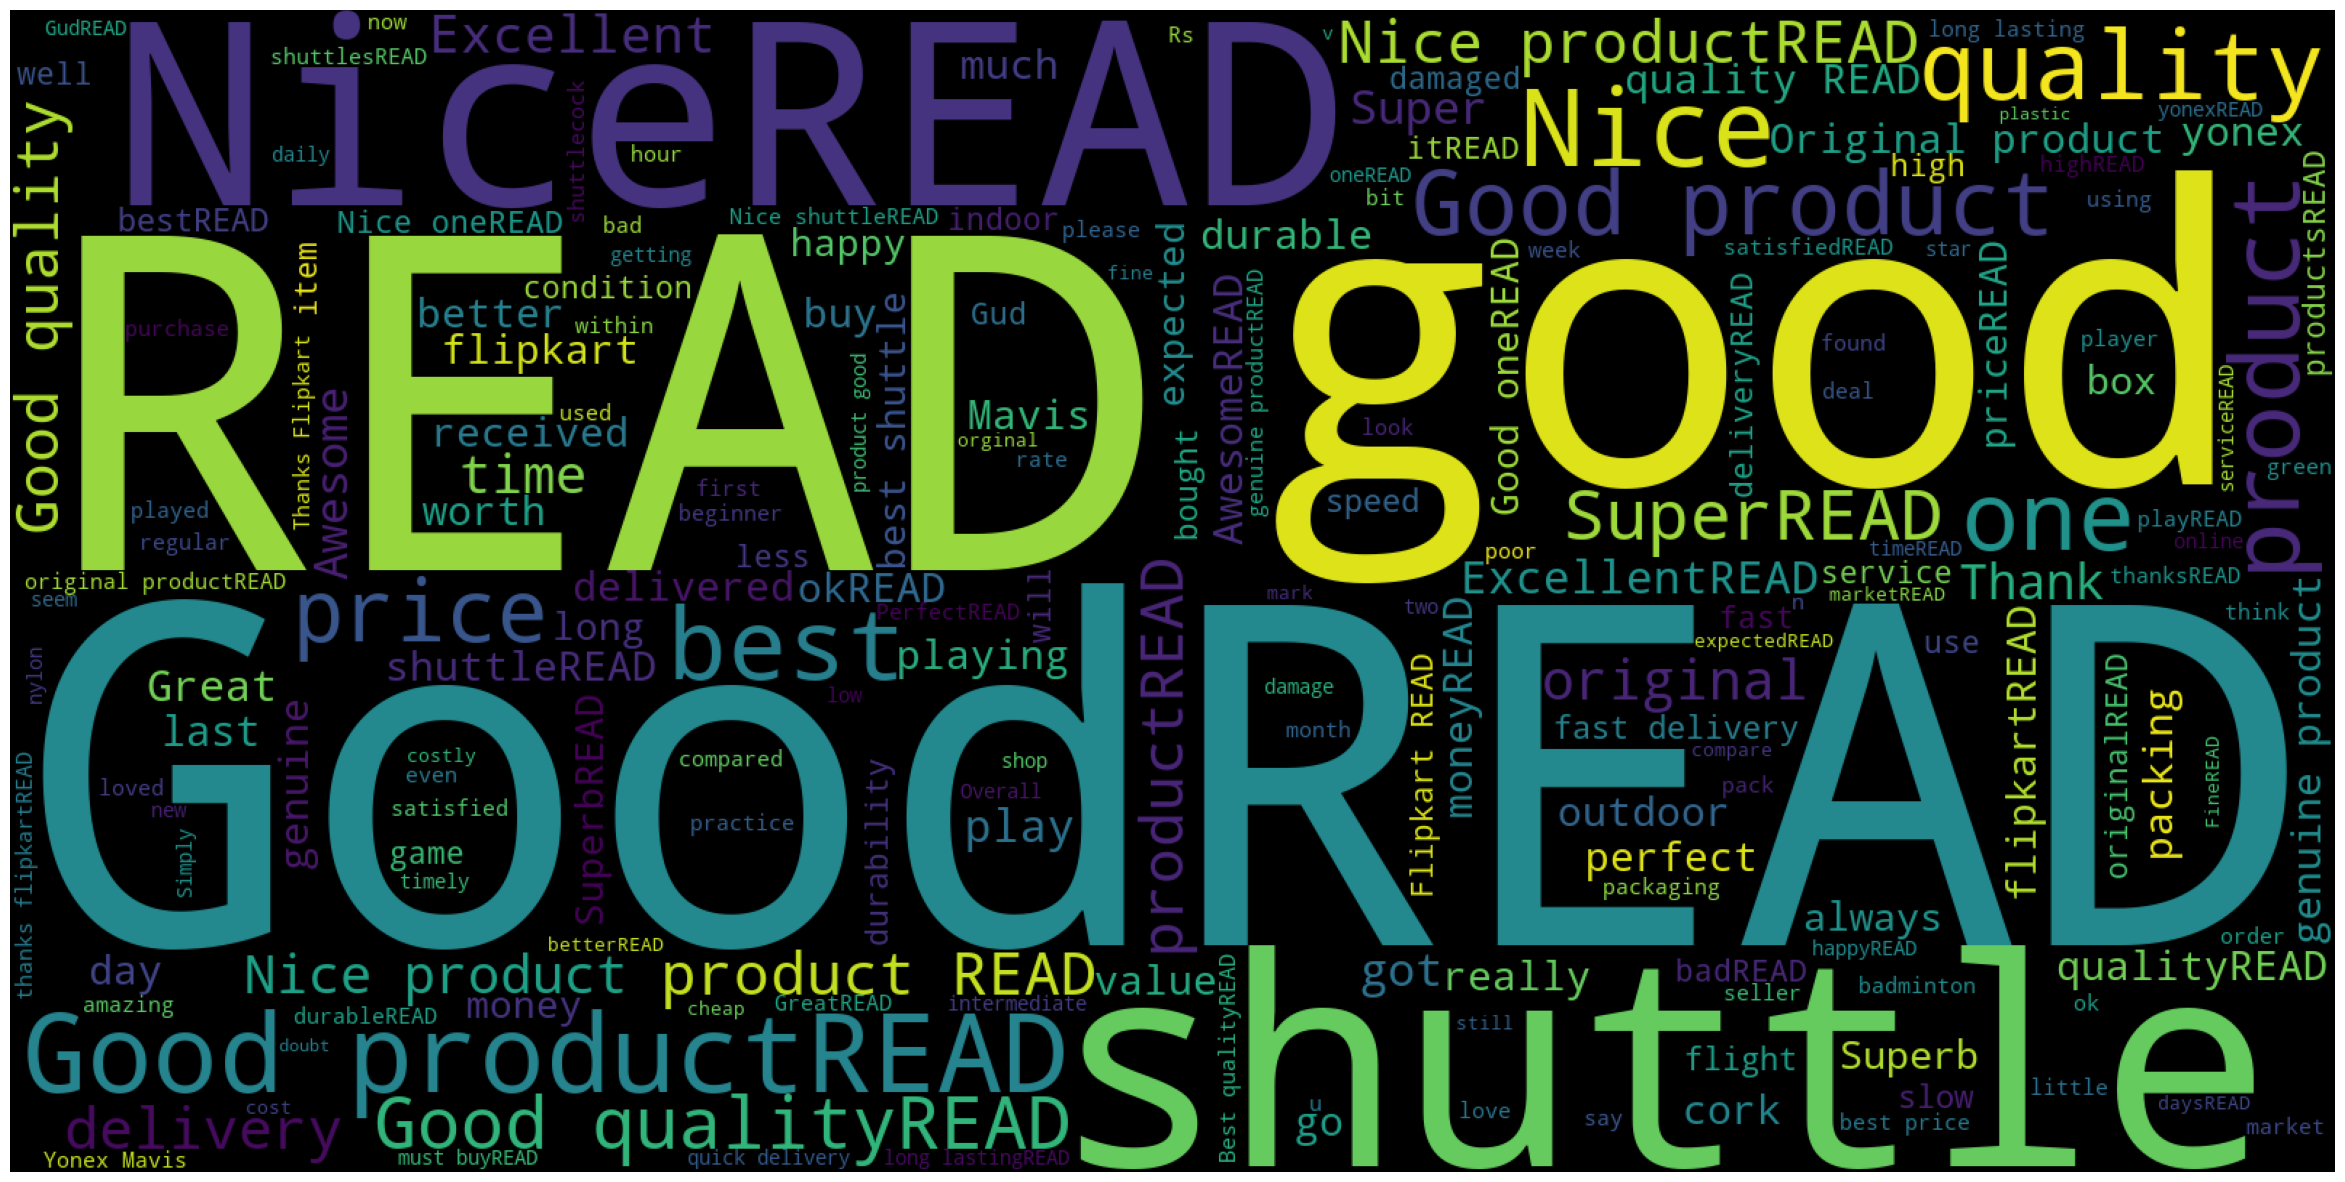

In [23]:
display_wordcloud(X_train['Review text'][y_train == 'Positive'])

#### Data Preprocessing

In [24]:
#Data Prepration - Text Preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [25]:
# Downnloading Stopwords
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adykh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adykh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adykh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [27]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()

    # remove stop words
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]

    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [28]:
from tqdm import tqdm, tqdm_notebook

In [29]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map

In [30]:
temp_df = X_train['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6382/6382 [00:42<00:00, 149.09it/s]


0  1
1095                                          nice read  2
7326                               good dry weatherread  3
1377                                     well brandread  2
2127  firstly yonex best company badminton shuttle b...  9
5096                                           goodread  1

In [31]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df.head()

clean_text_lemma  text_length_lemma
1095                                          nice read                  2
7326                               good dry weatherread                  3
1377                                     well brandread                  2
2127  firstly yonex best company badminton shuttle b...                  9
5096                                           goodread                  1

In [32]:
X_train

Review text
1095                               Very nice 👍READ MORE
7326                  Very good on dry weatherREAD MORE
1377                                Well brandREAD MORE
2127  Firstly  Yonex is best company  for badminton ...
5096                                      GoodREAD MORE
...                                                 ...
2895                            Quality good..READ MORE
7813           NOT BAD ITS REALLY GOOD QUALITYREAD MORE
905                                       GoodREAD MORE
5192                                  very badREAD MORE
235                          Bad Quality,,,,,,READ MORE

[6382 rows x 1 columns]

In [33]:
X_train = pd.concat([X_train, temp_df], axis=1)
X_train.head()

Review text  \
1095                               Very nice 👍READ MORE   
7326                  Very good on dry weatherREAD MORE   
1377                                Well brandREAD MORE   
2127  Firstly  Yonex is best company  for badminton ...   
5096                                      GoodREAD MORE   

                                       clean_text_lemma  text_length_lemma  
1095                                          nice read                  2  
7326                               good dry weatherread                  3  
1377                                     well brandread                  2  
2127  firstly yonex best company badminton shuttle b...                  9  
5096                                           goodread                  1

In [34]:
X_train['clean_text_lemma']

1095                                            nice read
7326                                 good dry weatherread
1377                                       well brandread
2127    firstly yonex best company badminton shuttle b...
5096                                             goodread
                              ...                        
2895                                    quality good read
7813                          bad really good qualityread
905                                              goodread
5192                                              badread
235                                      bad quality read
Name: clean_text_lemma, Length: 6382, dtype: object

## Step 4: Data Preprocessing on test data (X_test)

In [35]:
X_test.head()

Review text
3733                             Awesome....READ MORE
3491                                    goodREAD MORE
2532                                    NiceREAD MORE
4429  very nice product 👌👌 at a better priceREAD MORE
2698                         Genuine productREAD MORE

In [36]:
X_test.shape

(2128, 1)

In [37]:
temp_df = X_test['Review text'].progress_apply(lambda x: preprocess(x, 'lemma'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2128/2128 [00:13<00:00, 152.13it/s]


0  1
3733                   awesome read  2
3491                       goodread  1
2532                       niceread  1
4429  nice product better priceread  4
2698            genuine productread  2

In [38]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']
temp_df.head()

clean_text_lemma  text_length_lemma
3733                   awesome read                  2
3491                       goodread                  1
2532                       niceread                  1
4429  nice product better priceread                  4
2698            genuine productread                  2

In [39]:
X_test.head()

Review text
3733                             Awesome....READ MORE
3491                                    goodREAD MORE
2532                                    NiceREAD MORE
4429  very nice product 👌👌 at a better priceREAD MORE
2698                         Genuine productREAD MORE

In [40]:
X_test = pd.concat([X_test, temp_df], axis=1)
X_test.head()

Review text  \
3733                             Awesome....READ MORE   
3491                                    goodREAD MORE   
2532                                    NiceREAD MORE   
4429  very nice product 👌👌 at a better priceREAD MORE   
2698                         Genuine productREAD MORE   

                   clean_text_lemma  text_length_lemma  
3733                   awesome read                  2  
3491                       goodread                  1  
2532                       niceread                  1  
4429  nice product better priceread                  4  
2698            genuine productread                  2

In [41]:
X_test['clean_text_lemma']

3733                     awesome read
3491                         goodread
2532                         niceread
4429    nice product better priceread
2698              genuine productread
                    ...              
1711                 nice productread
7950                         goodread
6058    time got substandard one read
5709                     best oneread
4951                         goodread
Name: clean_text_lemma, Length: 2128, dtype: object

In [42]:
# For XGBoost Using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
y_train

1095    Positive
7326    Positive
1377    Positive
2127    Positive
5096    Positive
          ...   
2895    Positive
7813    Positive
905     Positive
5192    Negative
235     Negative
Name: Sentiment, Length: 6382, dtype: object

In [44]:
y_train_le = le.fit_transform(y_train)

In [45]:
y_train_le

array([1, 1, 1, ..., 1, 0, 0])

In [46]:
y_test

3733    Positive
3491    Positive
2532    Positive
4429    Positive
2698    Positive
          ...   
1711    Positive
7950    Positive
6058    Negative
5709    Positive
4951    Positive
Name: Sentiment, Length: 2128, dtype: object

In [47]:
y_test_le = le.fit_transform(y_test)

In [48]:
y_test_le

array([1, 1, 1, ..., 0, 1, 1])

## Implementing MLFlow

## Auto Logging Reviews Experiment Run Using MLFlow

**Step 1 - Import MLFlow and set the experiment name**

In [49]:
import mlflow
mlflow.set_experiment("reviews_classification_ml_algos")

2024/03/28 09:30:57 INFO mlflow.tracking.fluent: Experiment with name 'reviews_classification_ml_algos' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/adykh/Desktop/INNOMATICS/Assignments/Assignment%208/sentiment_analysis_app/mlruns/233941585379061000', creation_time=1711598457206, experiment_id='233941585379061000', last_update_time=1711598457206, lifecycle_stage='active', name='reviews_classification_ml_algos', tags={}>

## Creating Pipeline

In [50]:
import warnings

warnings.filterwarnings('ignore')

In [51]:
from joblib import Memory

In [52]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
from xgboost import XGBClassifier

In [57]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
# Define SMOTE for oversampling
smote = SMOTE(random_state=42)

In [60]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

In [63]:
# Define pipelines with SMOTE
pipelines = {
    'random_forest': ImbPipeline([
        ('vectorization', CountVectorizer()),
        ('smote', smote),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'logistic_regression': ImbPipeline([
        ('vectorization', CountVectorizer()),
        ('smote', smote),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'xgboost': ImbPipeline([
        ('vectorization', CountVectorizer()),
        ('smote', smote),
        ('classifier', XGBClassifier())
    ], memory=memory)
}

In [64]:
# Define parameter grid for each algorithm
param_grids = {
    'random_forest': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features': [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'xgboost': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.5],
            'classifier__max_depth': [3, 5, 7]
        }
    ]
}

In [65]:
# Create custom scorers for F1 score for positive and negative classes
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_pos': make_scorer(f1_score, pos_label='Positive'),
    'f1_neg': make_scorer(f1_score, pos_label='Negative')
}

In [66]:
best_models = {}

In [67]:
# Applying GridSearch
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring=scoring,
                               refit='accuracy',
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train['clean_text_lemma'], y_train_le)

    # Get the best hyperparameters and create the best model
    best_params = grid_search.best_params_
    best_model = pipelines[algo].set_params(**best_params)

    # Fit the best model on the whole training data
    best_model.fit(X_train['clean_text_lemma'], y_train_le)

    best_models[algo] = best_model

    # Calculate evaluation metrics on the test data
    y_test_pred_le = best_model.predict(X_test['clean_text_lemma'])
    y_test_pred = le.inverse_transform(y_test_pred_le)
    accuracy = accuracy_score(y_test, y_test_pred)
    f1_pos = f1_score(y_test, y_test_pred, pos_label='Positive')
    f1_neg = f1_score(y_test, y_test_pred, pos_label='Negative')

    print('Accuracy on Test Data: ', accuracy)
    print('F1 Score (Positive Class) on Test Data: ', f1_pos)
    print('F1 Score (Negative Class) on Test Data: ', f1_neg)

    # Display classification report
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:\n', report)

********** random_forest **********


2024/03/28 09:33:28 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 15min 3s
Wall time: 21min 3s


2024/03/28 09:54:32 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b96e24da48b74943a25ffd7e0a11f9c2', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/28 09:54:32 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'


Accuracy on Test Data:  0.9111842105263158
F1 Score (Positive Class) on Test Data:  0.9493704795070989
F1 Score (Negative Class) on Test Data:  0.638623326959847
Classification Report:
               precision    recall  f1-score   support

    Negative       0.62      0.65      0.64       255
    Positive       0.95      0.95      0.95      1873

    accuracy                           0.91      2128
   macro avg       0.79      0.80      0.79      2128
weighted avg       0.91      0.91      0.91      2128

********** logistic_regression **********


2024/03/28 09:55:03 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 21min 9s
Wall time: 24min 44s


2024/03/28 10:19:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3ed352f0c7714d34828f5988cdb1987c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/03/28 10:19:49 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'


Accuracy on Test Data:  0.8952067669172933
F1 Score (Positive Class) on Test Data:  0.9394186362401521
F1 Score (Negative Class) on Test Data:  0.6121739130434782
Classification Report:
               precision    recall  f1-score   support

    Negative       0.55      0.69      0.61       255
    Positive       0.96      0.92      0.94      1873

    accuracy                           0.90      2128
   macro avg       0.75      0.81      0.78      2128
weighted avg       0.91      0.90      0.90      2128

********** xgboost **********


2024/03/28 10:20:19 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 144 candidates, totalling 720 fits
CPU times: total: 1h 22min
Wall time: 29min 16s
Accuracy on Test Data:  0.9172932330827067
F1 Score (Positive Class) on Test Data:  0.9534391534391534
F1 Score (Negative Class) on Test Data:  0.6302521008403361
Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.59      0.63       255
    Positive       0.94      0.96      0.95      1873

    accuracy                           0.92      2128
   macro avg       0.81      0.78      0.79      2128
weighted avg       0.91      0.92      0.91      2128



In [68]:
# Stop the auto logger
mlflow.sklearn.autolog(disable=True)

In [69]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', TfidfVectorizer(max_features=5000)),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

xgboost
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
            

In [70]:
import os

In [71]:
import joblib

In [72]:
for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)

    # Save and load the best model using joblib
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')

    # Make predictions on the test data
    y_test_pred_le = model.predict(X_test['clean_text_lemma'])
    y_test_pred = le.inverse_transform(y_test_pred_le)
    accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate and print accuracy score
    accuracy = accuracy_score(y_test, y_test_pred)
    print("Test Score (Accuracy):", accuracy)

    # Calculate and print F1 score for positive class
    f1_pos = f1_score(y_test, y_test_pred, pos_label='Positive')
    print("F1 Score (Positive Class):", f1_pos)

    # Calculate and print F1 score for negative class
    f1_neg = f1_score(y_test, y_test_pred, pos_label='Negative')
    print("F1 Score (Negative Class):", f1_neg)

    # Print classification report for both classes
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['Negative', 'Positive']))

    # Print model size in bytes
    model_size = os.path.getsize(f'best_models/{name}.pkl')
    print("Model Size:", model_size, "Bytes")

********** random_forest **********
Test Score (Accuracy): 0.9111842105263158
F1 Score (Positive Class): 0.9493704795070989
F1 Score (Negative Class): 0.638623326959847
Classification Report:
              precision    recall  f1-score   support

    Negative       0.62      0.65      0.64       255
    Positive       0.95      0.95      0.95      1873

    accuracy                           0.91      2128
   macro avg       0.79      0.80      0.79      2128
weighted avg       0.91      0.91      0.91      2128

Model Size: 22632367 Bytes
********** logistic_regression **********
Test Score (Accuracy): 0.8952067669172933
F1 Score (Positive Class): 0.9394186362401521
F1 Score (Negative Class): 0.6121739130434782
Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.69      0.61       255
    Positive       0.96      0.92      0.94      1873

    accuracy                           0.90      2128
   macro avg       0.75      0.81    

===============================================================================